**Logistic Regression**

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [57]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train (1).csv


In [58]:
train_data = pd.read_csv('Titanic_train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test (1).csv


In [60]:
test_data = pd.read_csv('Titanic_test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


a. Load the dataset and perform exploratory data analysis (EDA)

In [61]:
# Display the first few rows of the train and test datasets
print("Train Data:")
print(train_data.head())

Train Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

In [62]:
print("\nTest Data:")
print(test_data.head())


Test Data:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


b. Examine the features, their types, and summary statistics

In [63]:
# Examine the features and their types in the train dataset
print("Train Data Info:")
print(train_data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [64]:
# Summary statistics for the train dataset
print("\nTrain Data Summary Statistics:")
print(train_data.describe(include='all'))


Train Data Summary Statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp 

In [65]:
# Examine the features and their types in the test dataset
print("\nTest Data Info:")
print(test_data.info())


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [66]:
# Summary statistics for the test dataset
print("\nTest Data Summary Statistics:")
print(test_data.describe(include='all'))


Test Data Summary Statistics:
        PassengerId      Pclass              Name   Sex         Age  \
count    418.000000  418.000000               418   418  332.000000   
unique          NaN         NaN               418     2         NaN   
top             NaN         NaN  Kelly, Mr. James  male         NaN   
freq            NaN         NaN                 1   266         NaN   
mean    1100.500000    2.265550               NaN   NaN   30.272590   
std      120.810458    0.841838               NaN   NaN   14.181209   
min      892.000000    1.000000               NaN   NaN    0.170000   
25%      996.250000    1.000000               NaN   NaN   21.000000   
50%     1100.500000    3.000000               NaN   NaN   27.000000   
75%     1204.750000    3.000000               NaN   NaN   39.000000   
max     1309.000000    3.000000               NaN   NaN   76.000000   

             SibSp       Parch    Ticket        Fare            Cabin Embarked  
count   418.000000  418.000000     

In [67]:
# Examine the features and their types in the train dataset
print("Train Data Info:")
print(train_data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [68]:
# Summary statistics for the train dataset
print("\nTrain Data Summary Statistics:")
print(train_data.describe(include='all'))


Train Data Summary Statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp 

In [69]:
# Examine the features and their types in the test dataset
print("\nTest Data Info:")
print(test_data.info())


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [70]:
# Summary statistics for the test dataset
print("\nTest Data Summary Statistics:")
print(test_data.describe(include='all'))


Test Data Summary Statistics:
        PassengerId      Pclass              Name   Sex         Age  \
count    418.000000  418.000000               418   418  332.000000   
unique          NaN         NaN               418     2         NaN   
top             NaN         NaN  Kelly, Mr. James  male         NaN   
freq            NaN         NaN                 1   266         NaN   
mean    1100.500000    2.265550               NaN   NaN   30.272590   
std      120.810458    0.841838               NaN   NaN   14.181209   
min      892.000000    1.000000               NaN   NaN    0.170000   
25%      996.250000    1.000000               NaN   NaN   21.000000   
50%     1100.500000    3.000000               NaN   NaN   27.000000   
75%     1204.750000    3.000000               NaN   NaN   39.000000   
max     1309.000000    3.000000               NaN   NaN   76.000000   

             SibSp       Parch    Ticket        Fare            Cabin Embarked  
count   418.000000  418.000000     

c. Create visualizations to visualize the distributions and relationships between features

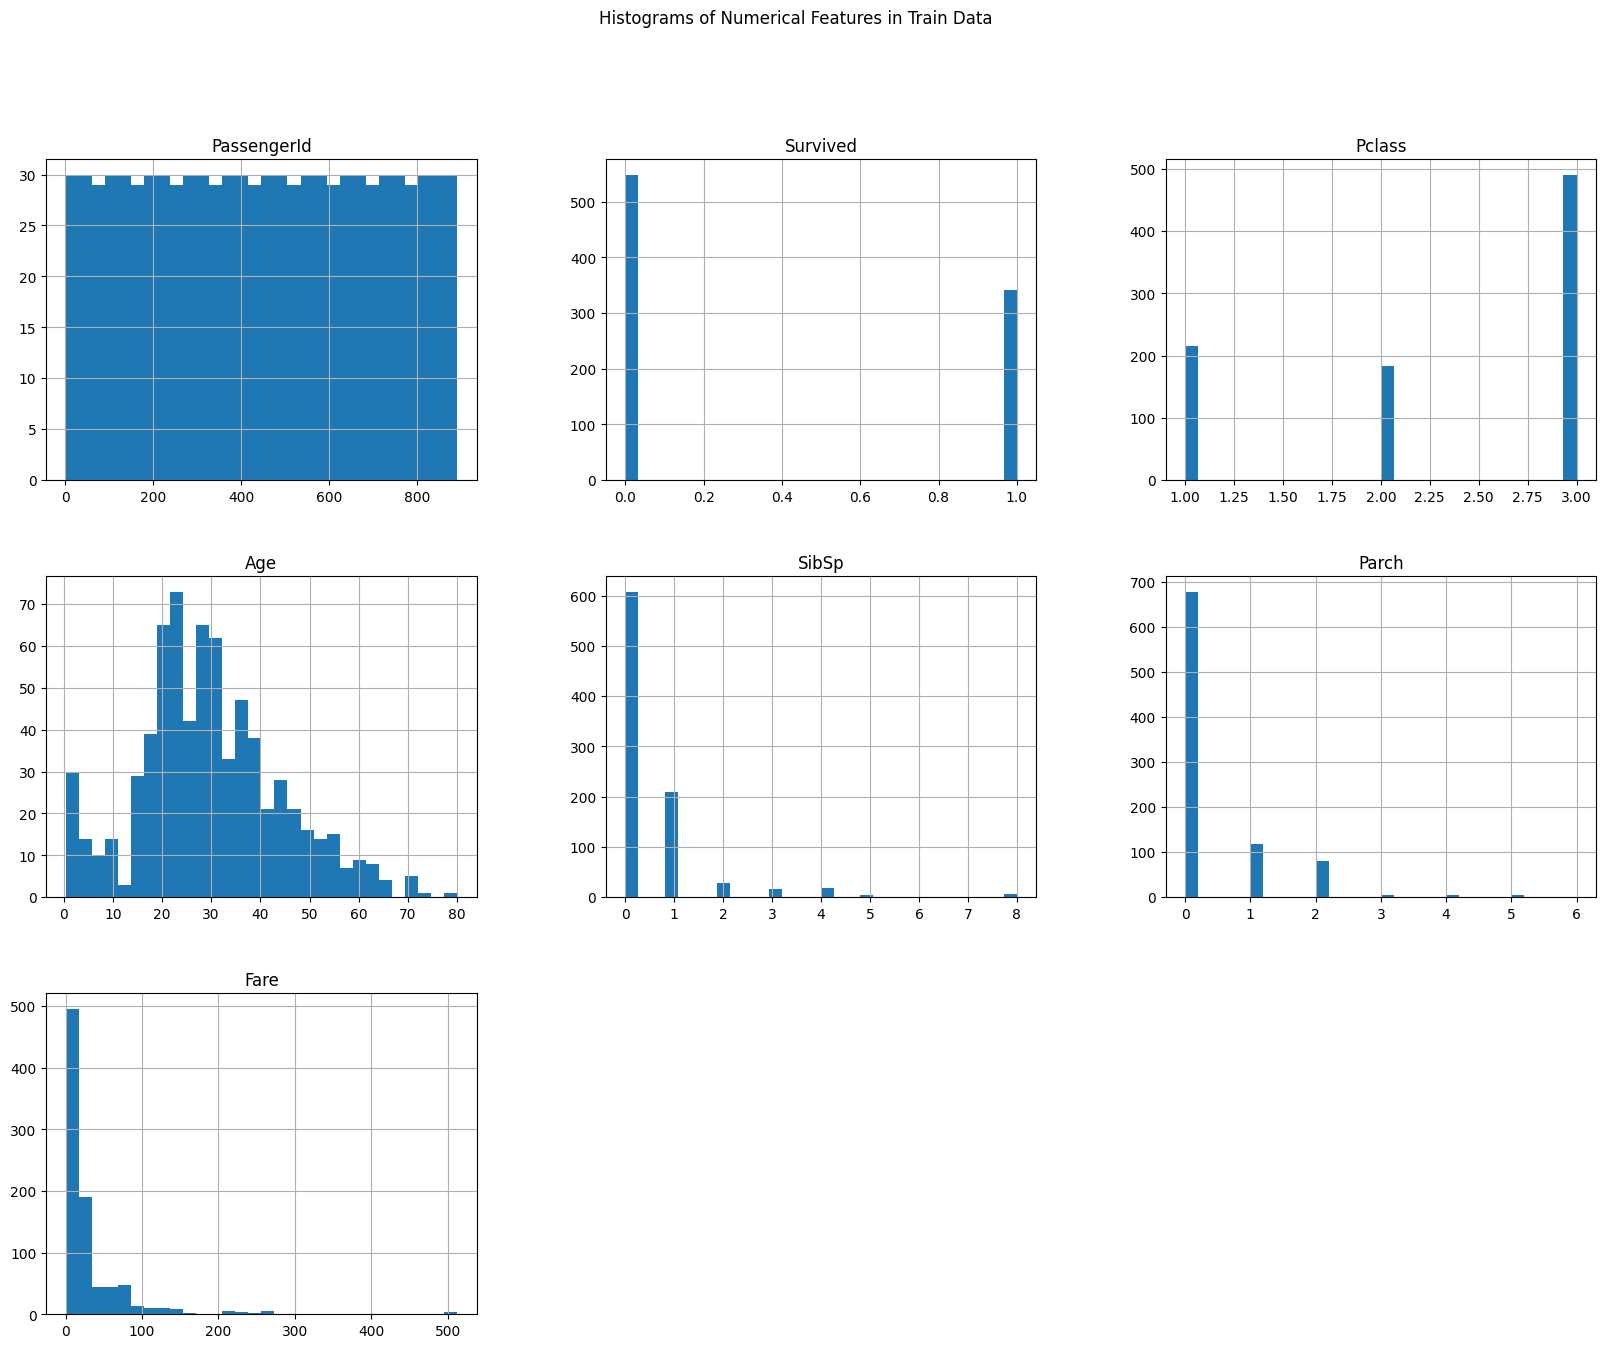

In [71]:
# Histograms for numerical features
train_data.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features in Train Data')
plt.show()

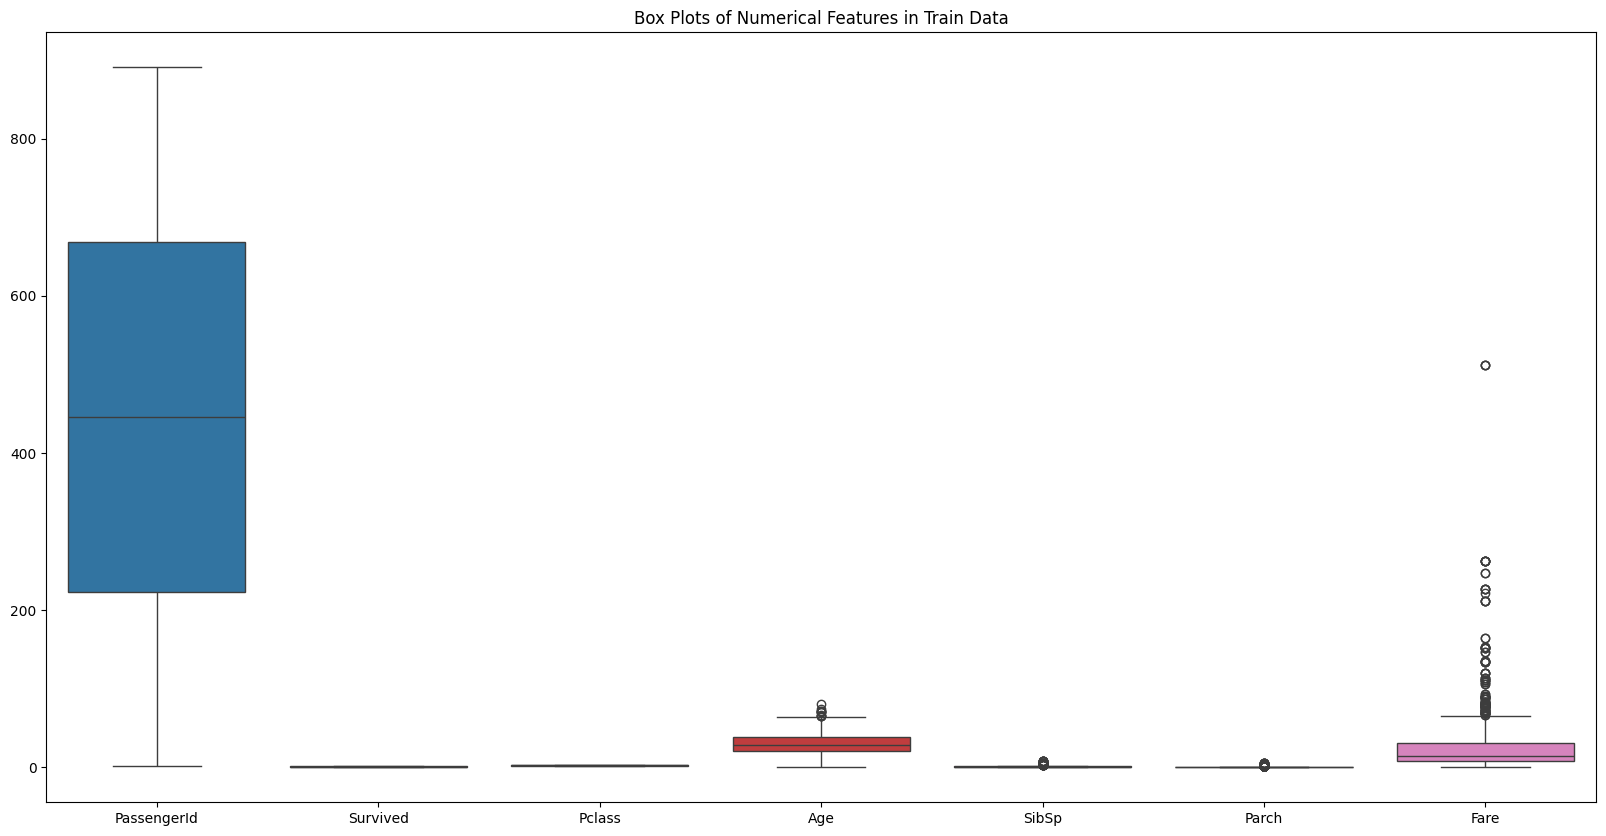

In [72]:
# Box plots for numerical features
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_data.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plots of Numerical Features in Train Data')
plt.show()

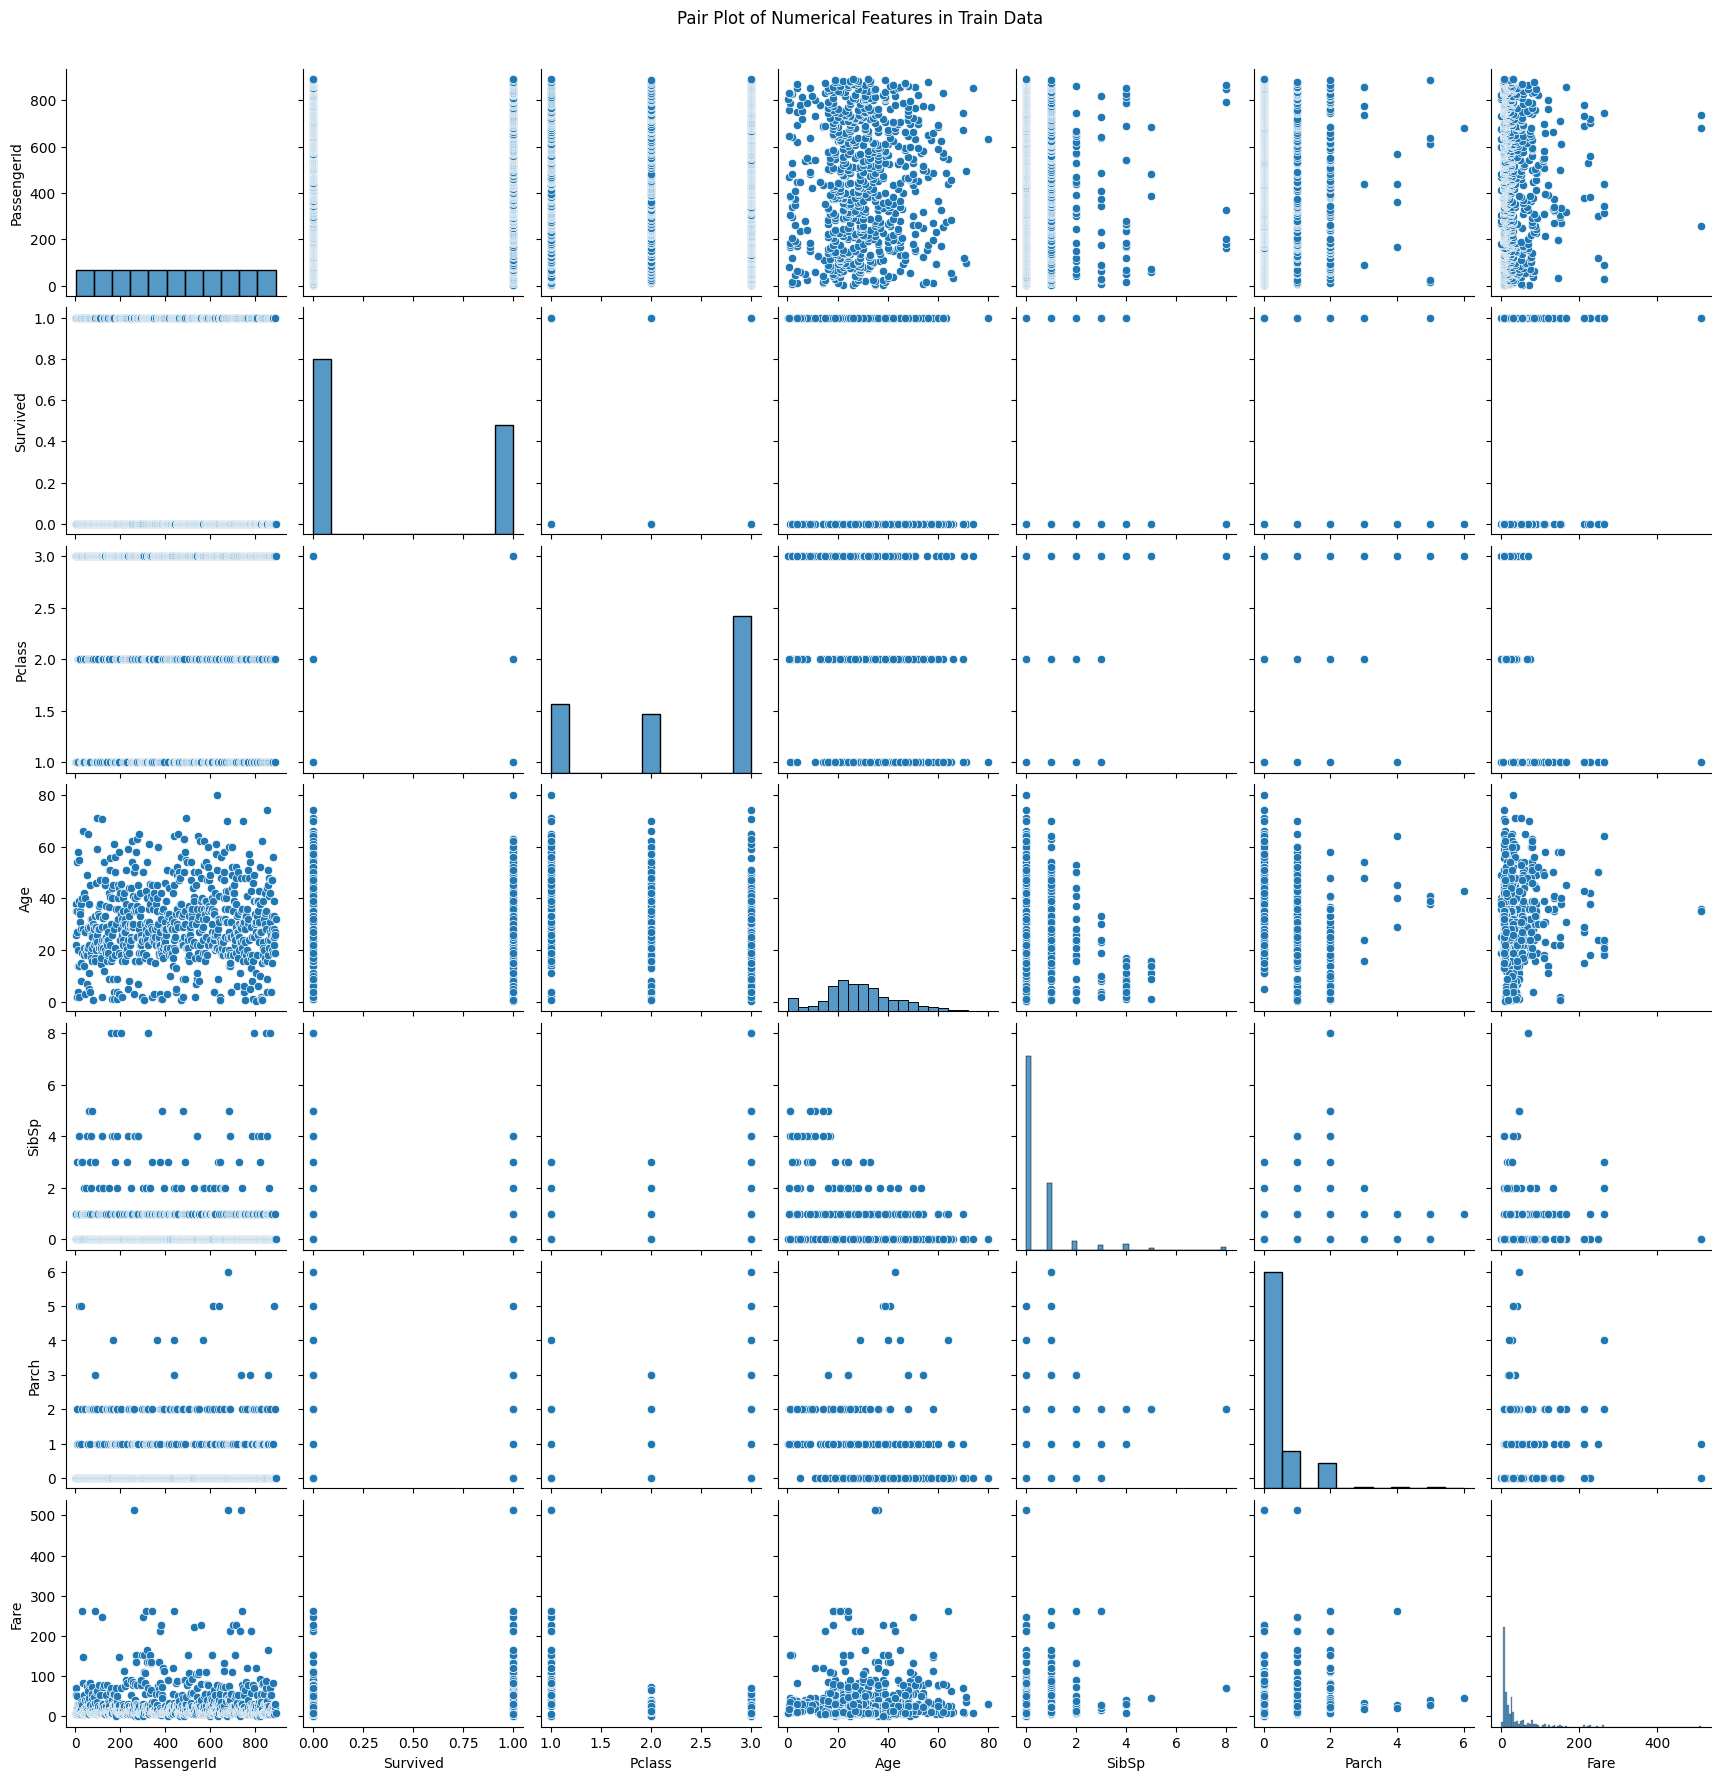

In [73]:
# Pair plot to visualize relationships between features
sns.pairplot(train_data.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pair Plot of Numerical Features in Train Data', y=1.02)
plt.show()

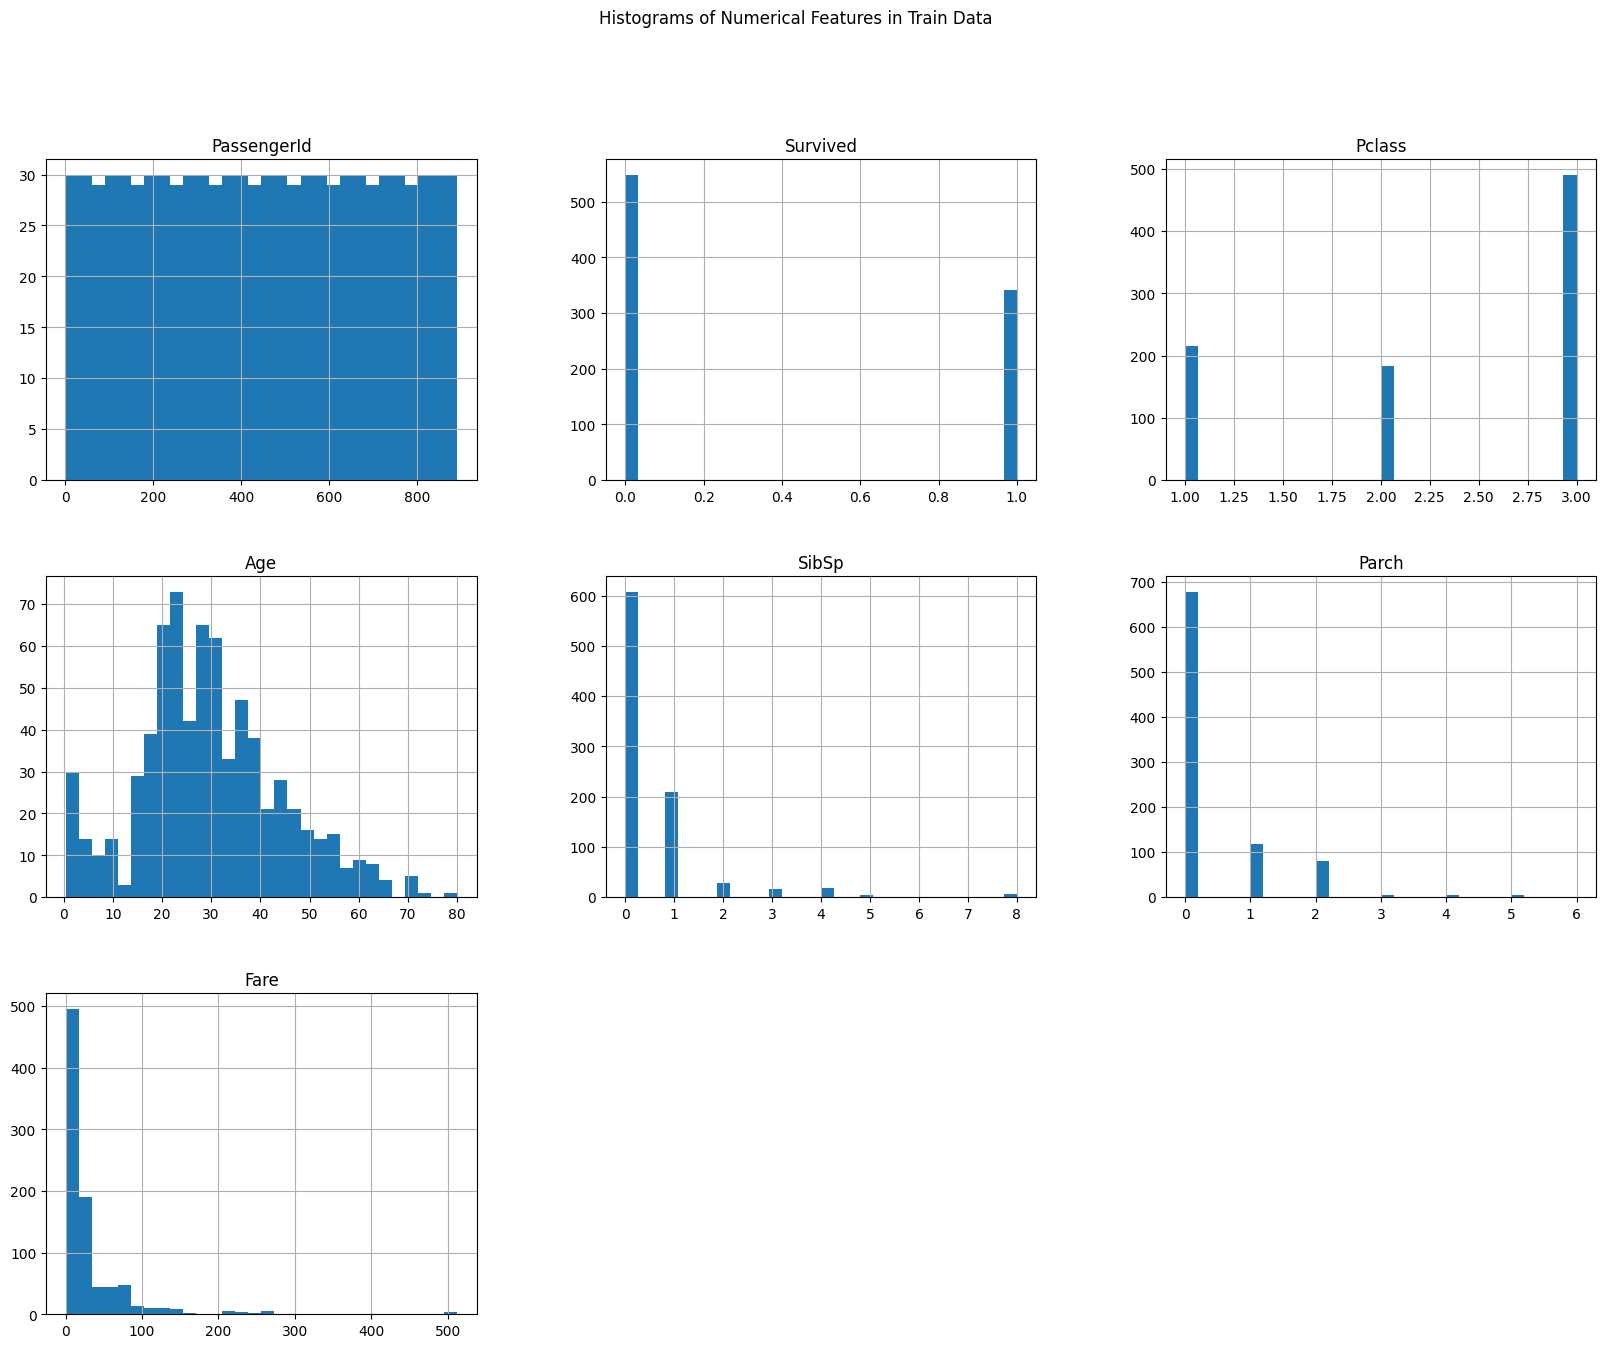

In [74]:
# Histograms for numerical features
train_data.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features in Train Data')
plt.show()

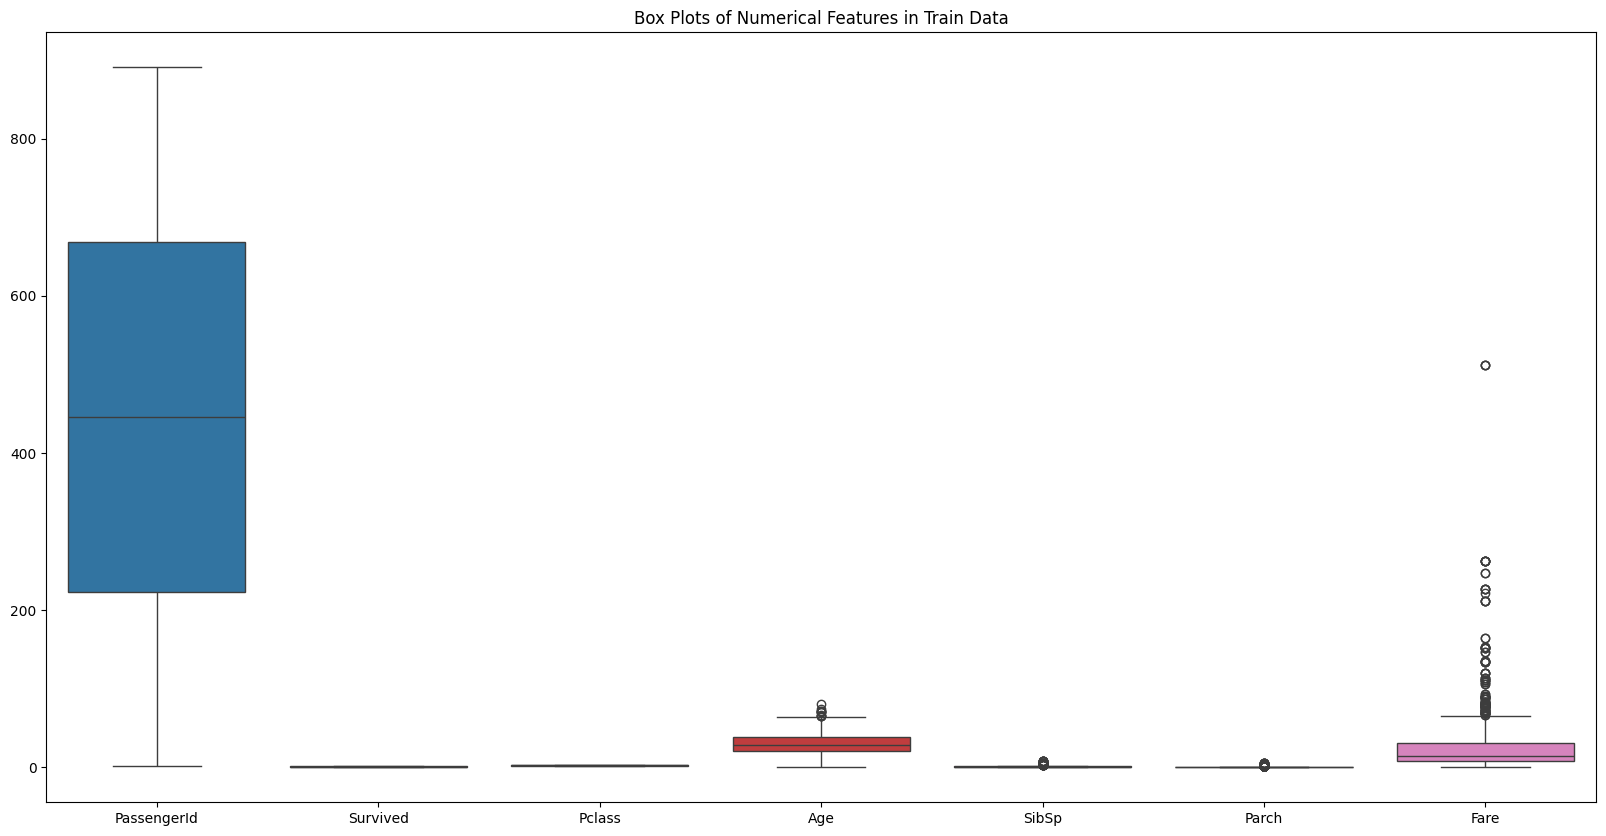

In [75]:
# Box plots for numerical features
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_data.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plots of Numerical Features in Train Data')
plt.show()

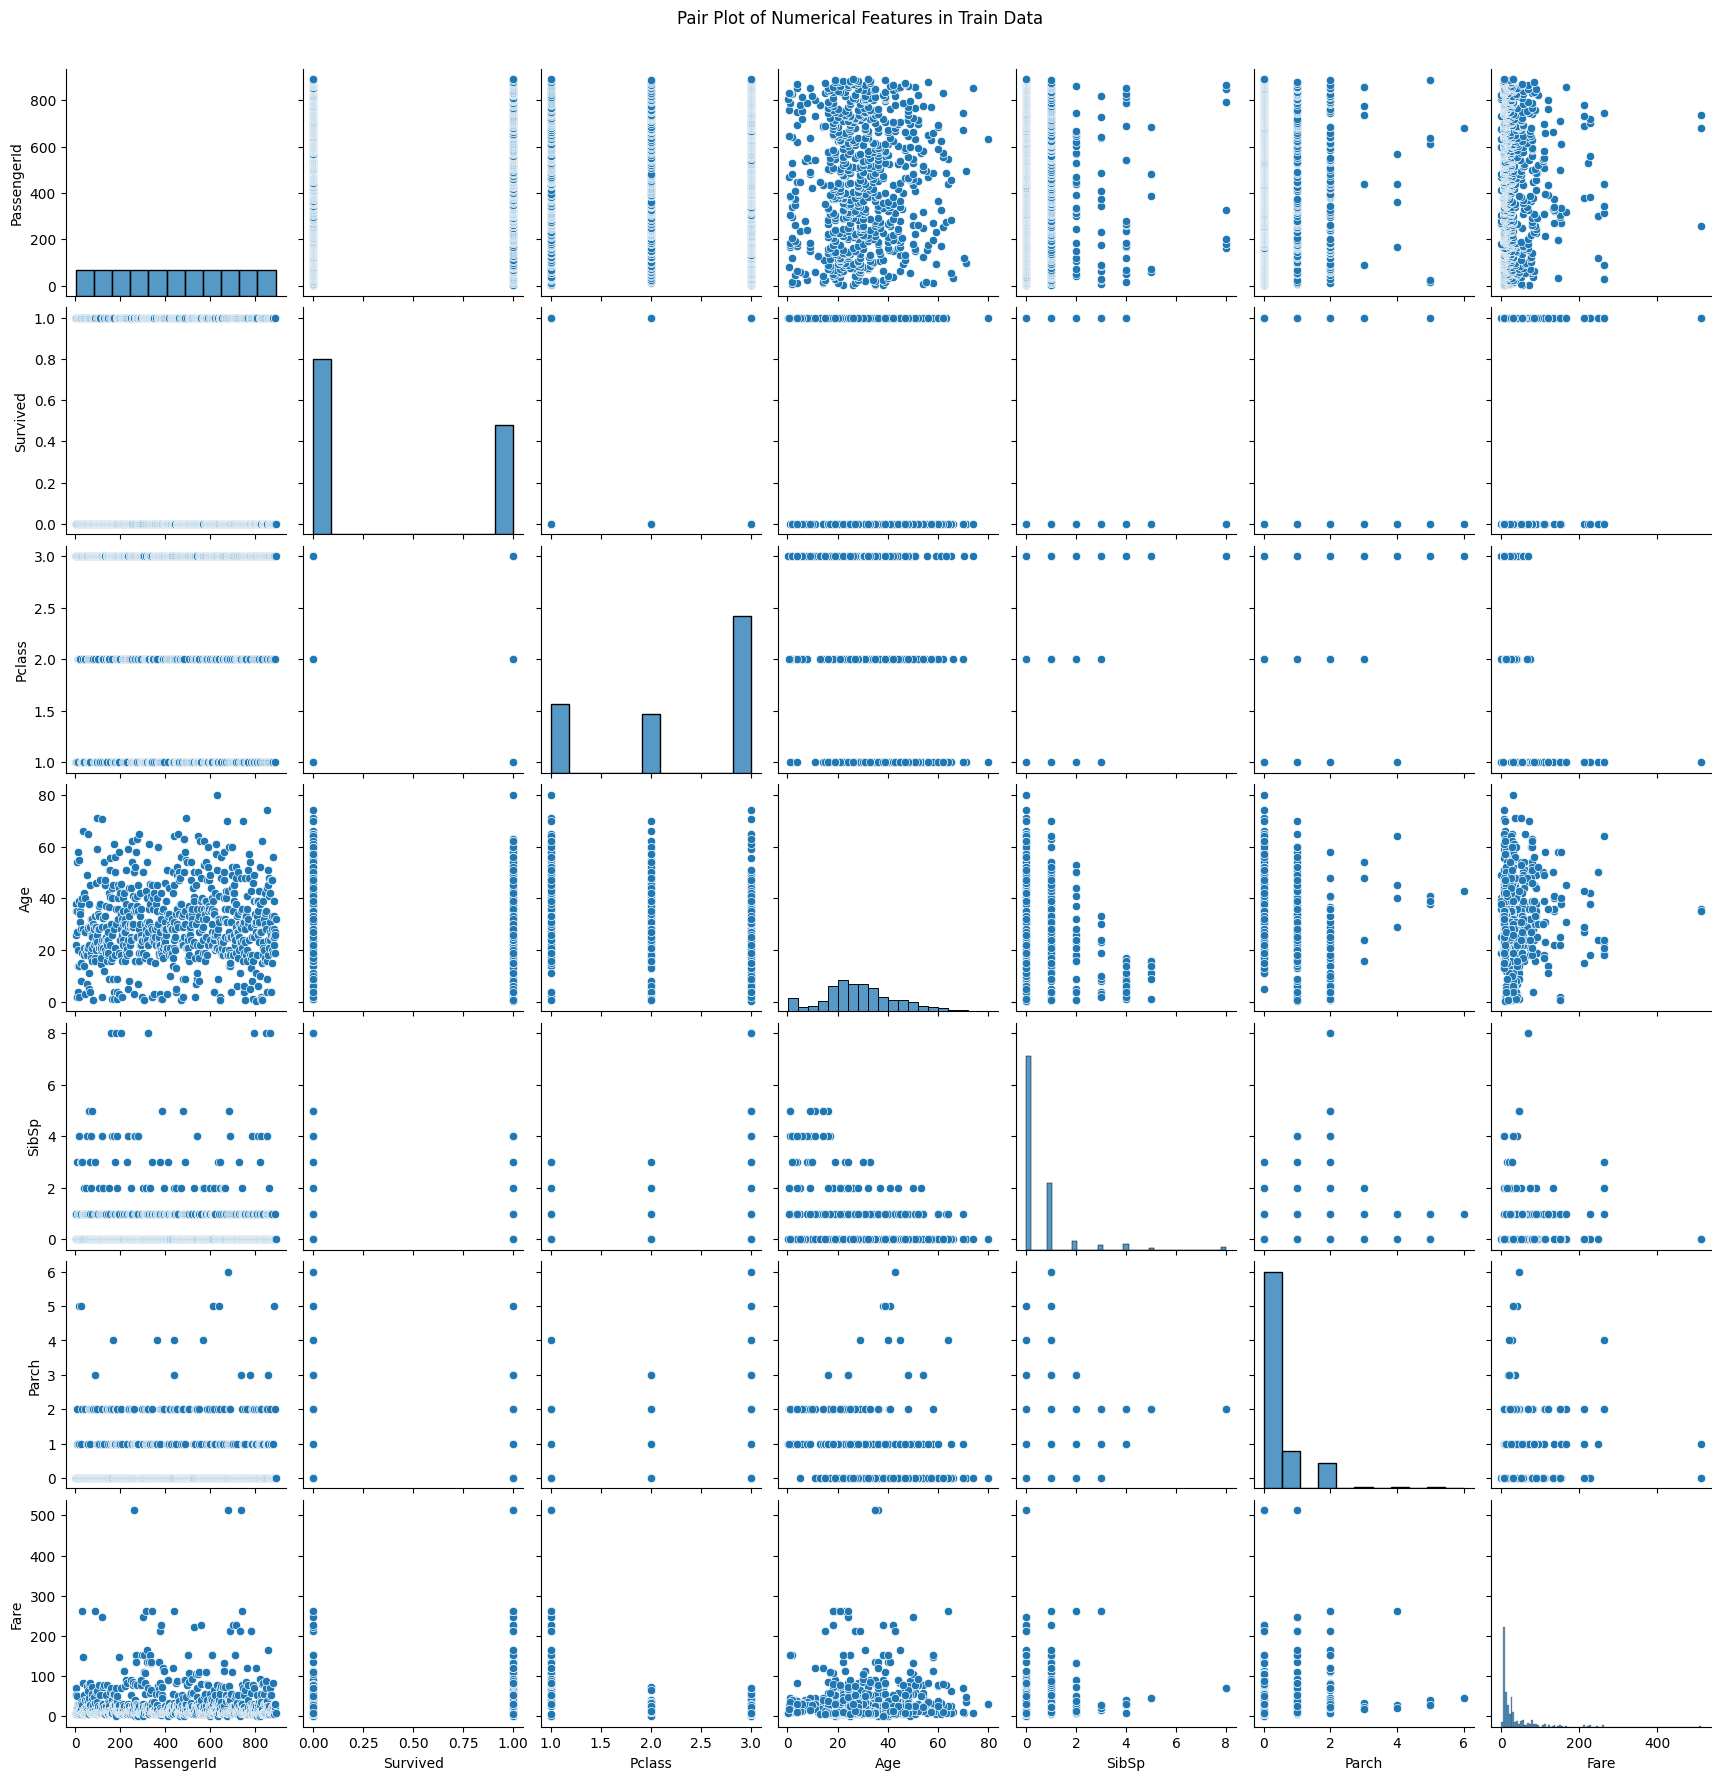

In [76]:
# Pair plot to visualize relationships between features
sns.pairplot(train_data.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pair Plot of Numerical Features in Train Data', y=1.02)
plt.show()

2. Data Preprocessing:

 a.Handle missing values (e.g., imputation).

 b. Encode categorical variables

In [77]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [78]:
# Define the preprocessing steps for numerical and categorical features
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Embarked']

In [79]:
# Imputer for numerical features
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [80]:
# OneHotEncoder for categorical features
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [81]:
# Combine both transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

In [82]:
# Apply transformations to the training data
train_data_preprocessed = preprocessor.fit_transform(train_data)

In [83]:
# Apply transformations to the test data
test_data_preprocessed = preprocessor.transform(test_data)

In [84]:
# Convert the result back to a DataFrame
train_data_preprocessed = pd.DataFrame(train_data_preprocessed, columns=num_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features)))
test_data_preprocessed = pd.DataFrame(test_data_preprocessed, columns=num_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features)))

In [85]:
# Display the first few rows of the preprocessed train and test datasets
print("Preprocessed Train Data:")
print(train_data_preprocessed.head())

print("\nPreprocessed Test Data:")
print(test_data_preprocessed.head())

Preprocessed Train Data:
        Age      Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0 -0.565736 -0.502445         0.0       1.0         0.0         0.0   
1  0.663861  0.786845         1.0       0.0         1.0         0.0   
2 -0.258337 -0.488854         1.0       0.0         0.0         0.0   
3  0.433312  0.420730         1.0       0.0         0.0         0.0   
4  0.433312 -0.486337         0.0       1.0         0.0         0.0   

   Embarked_S  
0         1.0  
1         0.0  
2         1.0  
3         1.0  
4         1.0  

Preprocessed Test Data:
        Age      Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0  0.394887 -0.490783         0.0       1.0         0.0         1.0   
1  1.355510 -0.507479         1.0       0.0         0.0         0.0   
2  2.508257 -0.453367         0.0       1.0         0.0         1.0   
3 -0.181487 -0.474005         0.0       1.0         0.0         0.0   
4 -0.565736 -0.401017         1.0       0.0         0.0         0.0   



**3. Model Building:**

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Assuming the data preprocessing step has been completed and we have train_data_preprocessed and test_data_preprocessed

We also need the 'Survived' column from the original train_data as the target variable

In [87]:
# Split the training data into features and target variable
X_train = train_data_preprocessed
y_train = train_data['Survived']

In [88]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

In [89]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [90]:
# Display the model coefficients
print("Model Coefficients:")
print(model.coef_)

Model Coefficients:
[[-0.1285895   0.50244063  1.19155288 -1.19154597  0.42208748 -0.21379527
  -0.2082853 ]]


In [91]:
# Make predictions on the training data
y_train_pred = model.predict(X_train)

In [92]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.7822671156004489
Confusion Matrix:
[[461  88]
 [106 236]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       549
           1       0.73      0.69      0.71       342

    accuracy                           0.78       891
   macro avg       0.77      0.76      0.77       891
weighted avg       0.78      0.78      0.78       891



In [93]:
# Apply the model to the test data
X_test = test_data_preprocessed
y_test_pred = model.predict(X_test)

In [94]:
# Note: We don't have the true labels for the test set, so we cannot evaluate the test predictions
print("Test Predictions:")
print(y_test_pred)

Test Predictions:
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


**4. Model Evaluation:**

a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [96]:
# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [97]:
# Train the model on the training split
model.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=1000)

In [98]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_prob = model.predict_proba(X_val)[:, 1]

In [99]:
# Calculate evaluation metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred_prob)

print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")
print(f"Validation F1-Score: {val_f1}")
print(f"Validation ROC-AUC Score: {val_roc_auc}")

Validation Accuracy: 0.776536312849162
Validation Precision: 0.7428571428571429
Validation Recall: 0.7027027027027027
Validation F1-Score: 0.7222222222222223
Validation ROC-AUC Score: 0.8557271557271556


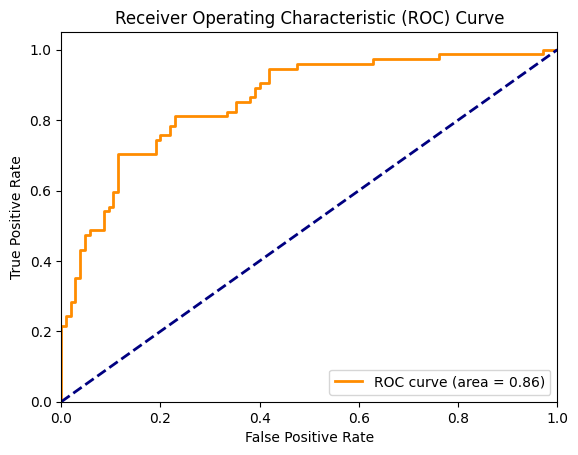

In [100]:
# Generate the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % val_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**5. Interpretation:**

a. Interpret the coefficients of the logistic regression model.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [101]:
# Extract the feature names after preprocessing
feature_names = num_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features))

In [102]:
# Extract the coefficients from the model
coefficients = model.coef_[0]

In [103]:
# Create a DataFrame to display feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [104]:
# Sort the DataFrame by the absolute value of the coefficients
coef_df['abs_coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False).drop(columns='abs_coefficient')

print("Coefficients of the Logistic Regression Model:")
print(coef_df)

Coefficients of the Logistic Regression Model:
      Feature  Coefficient
2  Sex_female     1.197228
3    Sex_male    -1.197224
1        Fare     0.434340
4  Embarked_C     0.422521
6  Embarked_S    -0.216415
5  Embarked_Q    -0.206102
0         Age    -0.066566


In [105]:
# Interpretation of significant features
print("\nInterpretation of Significant Features:")
for index, row in coef_df.iterrows():
    sign = "positive" if row['Coefficient'] > 0 else "negative"
    print(f"Feature '{row['Feature']}' has a {sign} coefficient of {row['Coefficient']:.4f}, indicating that as '{row['Feature']}' increases, the log-odds of survival {'increases' if sign == 'positive' else 'decreases'}.")


Interpretation of Significant Features:
Feature 'Sex_female' has a positive coefficient of 1.1972, indicating that as 'Sex_female' increases, the log-odds of survival increases.
Feature 'Sex_male' has a negative coefficient of -1.1972, indicating that as 'Sex_male' increases, the log-odds of survival decreases.
Feature 'Fare' has a positive coefficient of 0.4343, indicating that as 'Fare' increases, the log-odds of survival increases.
Feature 'Embarked_C' has a positive coefficient of 0.4225, indicating that as 'Embarked_C' increases, the log-odds of survival increases.
Feature 'Embarked_S' has a negative coefficient of -0.2164, indicating that as 'Embarked_S' increases, the log-odds of survival decreases.
Feature 'Embarked_Q' has a negative coefficient of -0.2061, indicating that as 'Embarked_Q' increases, the log-odds of survival decreases.
Feature 'Age' has a negative coefficient of -0.0666, indicating that as 'Age' increases, the log-odds of survival decreases.


**6. Deployment with Streamlit:**

In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.

In [106]:
pip install streamlit

In [107]:
import joblib

# Save the preprocessor and the model to disk
joblib.dump(preprocessor, 'preprocessor.joblib')
joblib.dump(model, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [108]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Load the preprocessor and the model
preprocessor = joblib.load('preprocessor.joblib')
model = joblib.load('logistic_regression_model.joblib')

# Define the user input function
def user_input_features():
    age = st.number_input('Age', min_value=0, max_value=100, value=30)
    fare = st.number_input('Fare', min_value=0.0, value=30.0)
    sex = st.selectbox('Sex', ['male', 'female'])
    embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])

    data = {
        'Age': age,
        'Fare': fare,
        'Sex': sex,
        'Embarked': embarked
    }
    features = pd.DataFrame(data, index=[0])
    return features

# User input
st.title('Titanic Survival Prediction')
st.sidebar.header('User Input Parameters')
input_df = user_input_features()

# Preprocess the user input
input_processed = preprocessor.transform(input_df)

# Make prediction
prediction = model.predict(input_processed)
prediction_proba = model.predict_proba(input_processed)

# Display the results
st.subheader('Prediction')
survival = np.array(['Not Survived', 'Survived'])
st.write(survival[prediction])

st.subheader('Prediction Probability')
st.write(prediction_proba)


In [110]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
